In [47]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os
import soundfile
import librosa

### Get Waves as a vector

In [48]:
folder_path = "data/audioMNIST"

# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

samplerate, data = wavfile.read(folder_path+ "/" +sample_file[0])

In [49]:
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector
print(duration,time)

0.244125 [0.00000e+00 1.25000e-04 2.50000e-04 ... 2.43750e-01 2.43875e-01
 2.44000e-01]


Text(0.5, 1.0, '2_theo_0.wav')

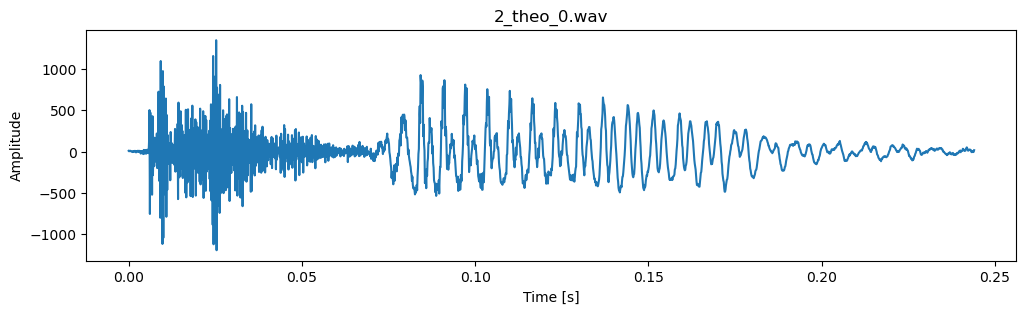

In [50]:
plt.figure(figsize=(12, 3))
plt.plot(time, data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title(sample_file[0])

### Using Torch

In [51]:
import torchaudio

In [52]:
print(torchaudio.info(folder_path+ "/" +sample_file[0]))

AudioMetaData(sample_rate=8000, num_frames=1953, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [53]:
sample_wav_file = folder_path+ "/" + sample_file[0]

waveform, sample_rate = torchaudio.load(sample_wav_file)
print(f"Shape of the waveform: {waveform.size()}\n")
print(f"Sampling rate of the audio file: {sample_rate}")


Shape of the waveform: torch.Size([1, 1953])

Sampling rate of the audio file: 8000


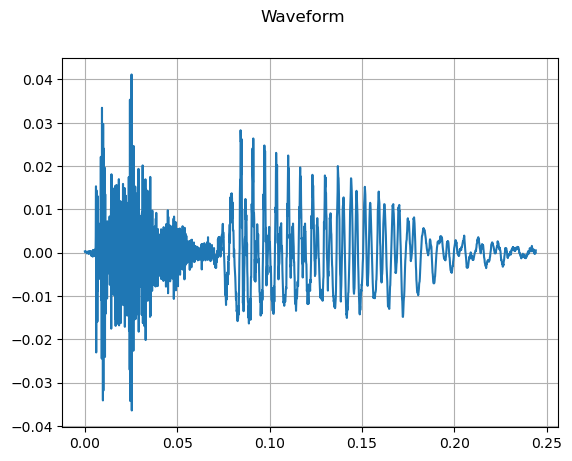

In [54]:
def plot_waveform(waveform, sample_rate, title = "Waveform"):
  waveform = waveform.numpy()
  num_channels, num_frames = waveform.shape
  time = np.arange(0, num_frames) / sample_rate

  fig, axes = plt.subplots(num_channels, 1)
  
  if num_channels == 1:
    axes = [axes]
  for ch in range(num_channels):
    axes[ch].plot(time, waveform[ch])
    axes[ch].grid(True)

    if num_channels > 1:
      axes[ch].set_ylabel(f"Channel: {ch+1}")
  plt.suptitle(title)
  plt.show(block = False)

plot_waveform(waveform, sample_rate)

In [55]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

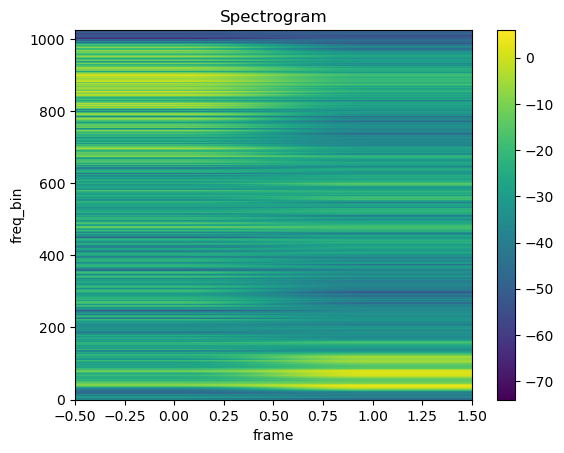

tensor([[[5.5727e-04, 1.3629e-05],
         [3.4716e-04, 3.2801e-05],
         [1.0512e-04, 7.2232e-05],
         ...,
         [1.5883e-06, 8.2228e-06],
         [3.0074e-06, 7.3328e-06],
         [2.0497e-05, 1.0917e-06]]])


In [74]:
n_fft = 2048
hop_length = 1024

spectrogram = torchaudio.transforms.Spectrogram(n_fft=n_fft,
                            hop_length=hop_length,
                            center=True,
                            pad_mode="reflect",
                            power=2.0)
spec = spectrogram(waveform)
plot_spectrogram(
    spec[0], title="Spectrogram")

print(spec)

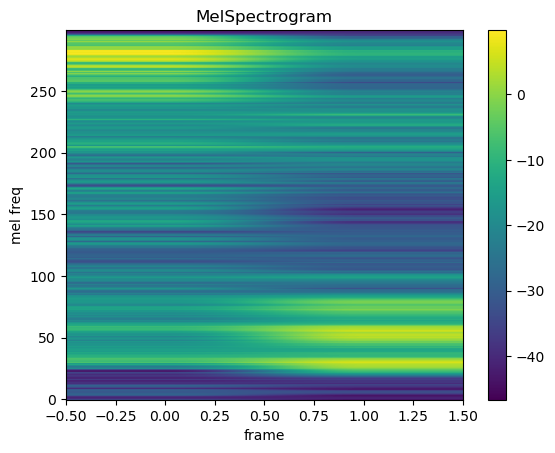

In [88]:
n_fft = 2048
hop_length = 1024
n_mels = 300

mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate,
                                   n_fft=n_fft,
                                   hop_length=hop_length,
                                   n_mels=n_mels)

melspec = mel_spectrogram(waveform)
plot_spectrogram(
    melspec[0], title="MelSpectrogram", ylabel='mel freq')



In [82]:
melspec.size()

torch.Size([1, 128, 2])